파이프라인을 사용한 효율적인 워크플로

In [1]:
from IPython.display import Image

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['B','M'])

array([0, 1])

In [5]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2, stratify=y,random_state=1)

파이프라인으로 변환기와 추정기 연결

In [6]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_01.png', width=500)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression()
)
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test,y_test)
test_acc

0.956140350877193

K-겹 교차 검증을 사용한 모델 성능 평가
  - 홀드아웃 방법

In [8]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_02.png', width=500)

 K겹 교차검증

In [9]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_03.png', width=500)

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
print(len(X_train))
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print(f"폴드 : {k+1} 클래스분포:{np.bincount(y_train[train]) } 정확도:{score}")



455
폴드 : 1 클래스분포:[256 153] 정확도:0.9347826086956522
폴드 : 2 클래스분포:[256 153] 정확도:0.9347826086956522
폴드 : 3 클래스분포:[256 153] 정확도:0.9565217391304348
폴드 : 4 클래스분포:[256 153] 정확도:0.9565217391304348
폴드 : 5 클래스분포:[256 153] 정확도:0.9347826086956522
폴드 : 6 클래스분포:[257 153] 정확도:0.9555555555555556
폴드 : 7 클래스분포:[257 153] 정확도:0.9777777777777777
폴드 : 8 클래스분포:[257 153] 정확도:0.9333333333333333
폴드 : 9 클래스분포:[257 153] 정확도:0.9555555555555556
폴드 : 10 클래스분포:[257 153] 정확도:0.9555555555555556


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print(f"정확도 점수: {scores} 정확도 : {np.mean(scores)}")

정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556] 정확도 : 0.9495169082125603


In [12]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,cv=10,
    n_jobs=-1,
    method = 'predict_proba'
)
preds[:10], np.argmax(preds[:10],axis=1),y_train[:10]

(array([[9.93982352e-01, 6.01764759e-03],
        [7.64328337e-01, 2.35671663e-01],
        [9.72683946e-01, 2.73160539e-02],
        [8.41658121e-01, 1.58341879e-01],
        [9.97144940e-01, 2.85506043e-03],
        [9.99803660e-01, 1.96339882e-04],
        [9.99324159e-01, 6.75840609e-04],
        [2.12145074e-06, 9.99997879e-01],
        [1.28668437e-01, 8.71331563e-01],
        [7.76260670e-04, 9.99223739e-01]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]))

학습곡선과 검증곡선을 사용
  - 학습곡선으로 편향과 분산문제 분석

In [13]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_04.png', width=600)

In [14]:
import matplotlib.pyplot as plt
# 데이터의 크기를 변경하면서 모델의 성능을 측정
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',max_iter = 10000) )

[ 40  81 122 163 204 245 286 327 368 409]


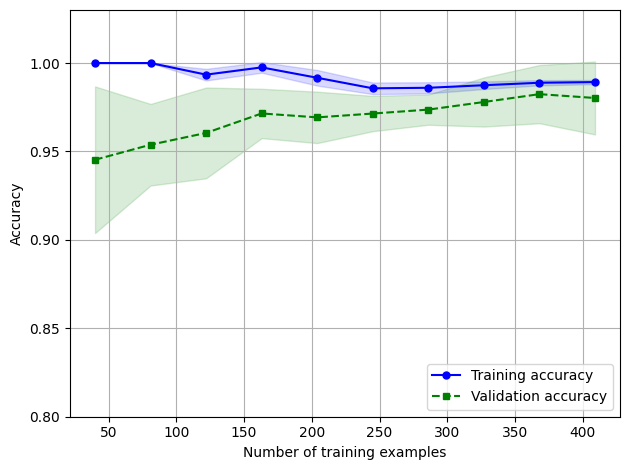

In [15]:
train_sizes,train_scores,test_scores =  learning_curve(estimator=pipe_lr,
               X=X_train,
               y=y_train,
               train_sizes = np.linspace(0.1,1.0,10),
               cv=10,
               n_jobs=1
               )
print(train_sizes)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='blue',marker='o',markersize=5,label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue'
                 )

plt.plot(train_sizes, test_mean, color='green',marker='s',linestyle='--',  markersize=5,label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green'
                 )
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.tight_layout()
plt.show()

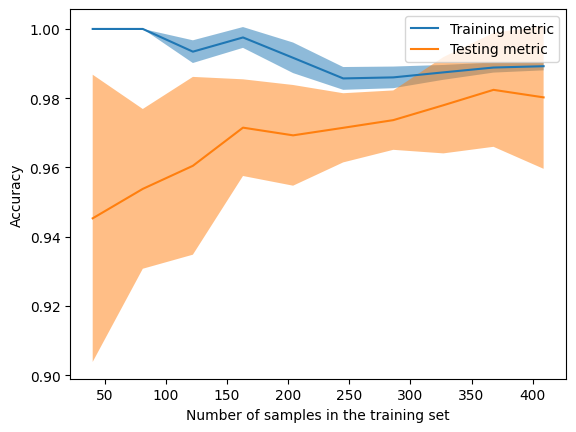

In [16]:
from sklearn.model_selection import LearningCurveDisplay
display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores,
    score_name = 'Accuracy'
)
display.plot(score_type = 'both')
plt.legend()
plt.show()

검증 곡선으로 과대적합과 과소적합 조사

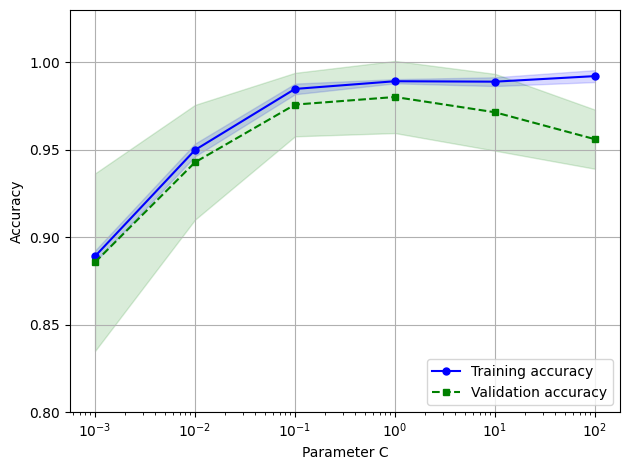

In [18]:
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
train_scores, test_scores =  validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name = 'logisticregression__C',  # logisticregression 모델의 파라메터로 C에 대한 값
    param_range=param_range,
    cv=10
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range, train_mean, color='blue',marker='o',markersize=5,label='Training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue'
                 )

plt.plot(param_range, test_mean, color='green',marker='s',linestyle='--',  markersize=5,label='Validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green'
                 )
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.tight_layout()
plt.show()


그리드 서치를 사용한 머신러닝 모델 세부 튜닝

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [
              {'svc__C': param_range,
               'svc__kernel': ['linear']},

              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}
              ]
#refit=True 최적의 하이퍼 파라메터를 찾아서 전체데이터에 대해 다시 학습
# refit=False면 찾은 하이퍼 파라메터로 재 학습
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10
                  )
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [24]:
clf = gs.best_estimator_
print(f"테스트 정확도 : {clf.score(X_test,y_test)}")

테스트 정확도 : 0.9736842105263158


랜덤서치로 하이퍼파라메터 설저을 더 넓게 탐색

In [25]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_11.png', width=600)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)
param_grid = [
    { 'svc__C':param_range,
      'svc__kernel':['linear']
     },
    {
        'svc__C':param_range,
        'svc__gamma':param_range,
        'svc__kernel': ['rbf']
    }
]
rs = RandomizedSearchCV(
    estimator=pipe_svc, param_distributions=param_grid,
    scoring='accuracy',
    refit=True,
    n_iter=20,
    cv=10,
    random_state=1,
    n_jobs=-1
)
rs.fit(X_train,y_train)
print(f"best score: {rs.best_score_}")
print(f"best param :{rs.best_params_}")

best score: 0.9737681159420291
best param :{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 10.0}


In [31]:
print(f"테스트 정확도 : {rs.score(X_test,y_test)}")

테스트 정확도 : 0.9649122807017544


SH방식을 사용한 자원 효율적 파라메터 검색
  - Successive Halving
    - 후보모델을 반복적으로 성능에 따라 걸러내는 과정을 통해 최적의 하이퍼파라메터를 찾는다

In [32]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [35]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource = 'n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1
)

In [36]:
hs.fit(X_train,y_train)
print(f"best score : {hs.best_score_}")
print(f"best params : {hs.best_params_}")

best score : 0.9676470588235293
best params : {'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 100.0}


In [37]:
clf = hs.best_estimator_
print(f"test score : {hs.score(X_test,y_test)}")

test score : 0.9649122807017544


분류모델의 성능평가 지표
  - 오차 행렬

In [38]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch06/figures/06_08.png', width=300)



1.   정확도(Accuracy)
  - 전체예측에서 올바르게 분류되 비율,모델의 전반적인 성능
  - (TP+TN) / (TP9+FN+FP+TN)
2.   정밀도(Precision)
  - P로 예측한 데이중에 실제 P
  - TP / TP+FP
  - 스팸필터에서 스팸으로 분류된 이메일중에서 실제 스펨인 비율
3.   재현률(Recall)
  - 실제 P중에 P로 예측한 비율
  - 실제 암환자를 찾는게 중요함
  - TP / TP+FN
4.   F1점수(F1 Score)
  - 2번과 3번의 조합
  -  (2 X Precision x Recall) / (Precision + Recall)
5.   특이도(Specificity)
  - Negative 중 모델이 올바르게 분류한 비율, 실제 부정사례를 올바르게 분류하는데 중요



In [39]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred = y_pred)
confmat

array([[71,  1],
       [ 2, 40]])

In [40]:
pipe_svc.score(X_test,y_test)  # accuracy

0.9736842105263158

In [41]:
(71+40) / (71+1+2+40)

0.9736842105263158

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [44]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.975609756097561
0.9523809523809523
0.963855421686747
0.9736842105263158
